## Imports

In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py

import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Basics

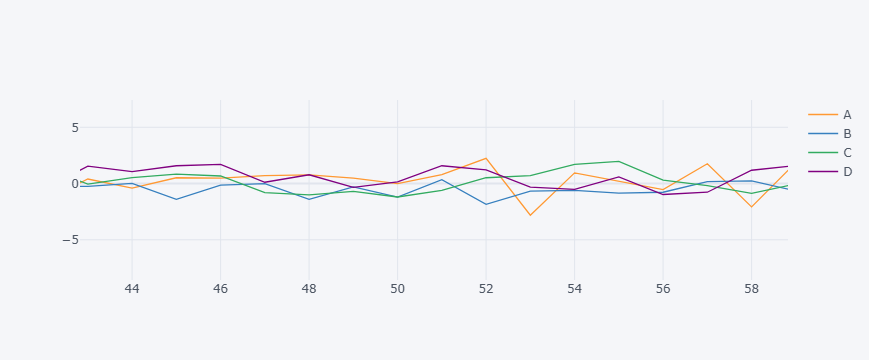

In [7]:
arr_1 = np.random.randn(100,4)
df_1 = pd.DataFrame(arr_1, columns=["A","B","C","D"])
df_1.head()
df_1.iplot()

## Line plots

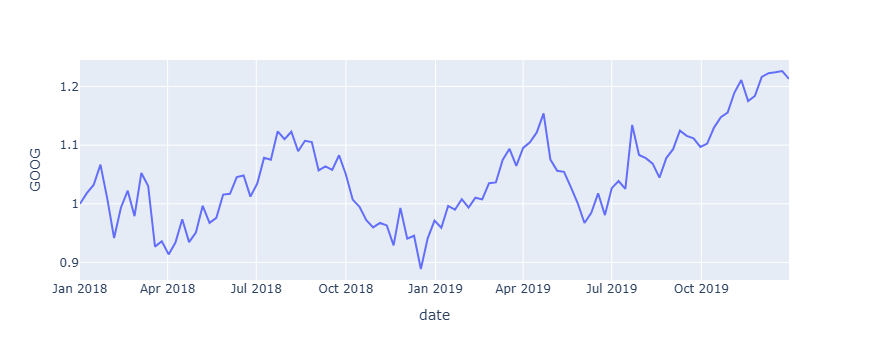

In [3]:
import plotly.graph_objects as go
df_stocks = px.data.stocks()
px.line(df_stocks, x = "date", y="GOOG", labels = {"x": 'Date', "y": "Price"})

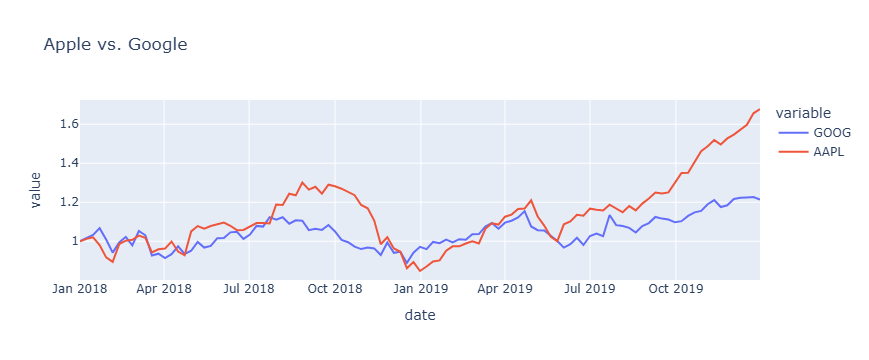

In [21]:
px.line(df_stocks, x='date', y=["GOOG","AAPL"], labels={"x":"Date", "y":"Price"}, title="Apple vs. Google")

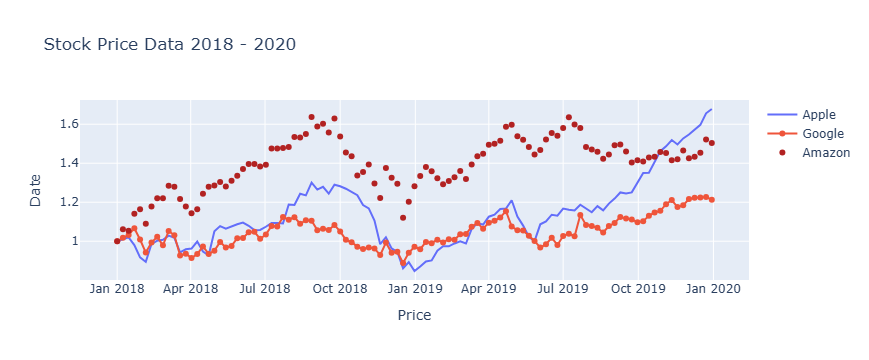

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode="lines", name="Apple"))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode="lines+markers", name="Google"))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode="markers", name="Amazon",
                        line=dict(color='firebrick', width=2, dash='dashdot')))
fig.update_layout(title="Stock Price Data 2018 - 2020", xaxis_title = "Price", yaxis_title="Date")


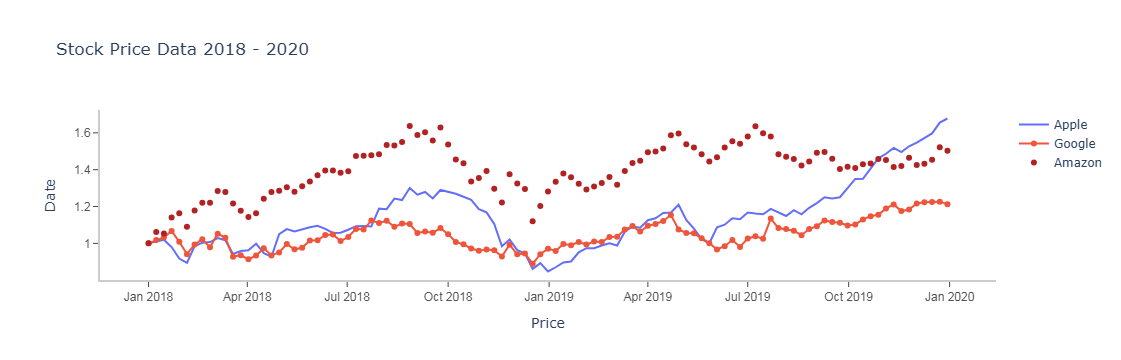

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, mode="lines", name="Apple"))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, mode="lines+markers", name="Google"))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, mode="markers", name="Amazon",
                        line=dict(color='firebrick', width=2, dash='dashdot')))
fig.update_layout(
title="Stock Price Data 2018 - 2020", xaxis_title = "Price", yaxis_title="Date",
xaxis=dict(
    showline=True, showgrid=True, showticklabels=True,
    linecolor='rgb(204,204,204)',
    linewidth=2, ticks='outside', tickfont=dict(
    family='Arial', size=12, color='rgb(82,82,82)')),
yaxis=dict(
    showgrid=True, showline=True, showticklabels=True,
    linecolor='rgb(204,204,204)',
    linewidth=2, ticks='outside', tickfont=dict(
    family='Arial', size=12, color='rgb(82,82,82)')),
autosize=True,
margin=dict(
autoexpand=True, l=100, r=20, t=110, ),
showlegend=True, plot_bgcolor='white')

## Bar plots

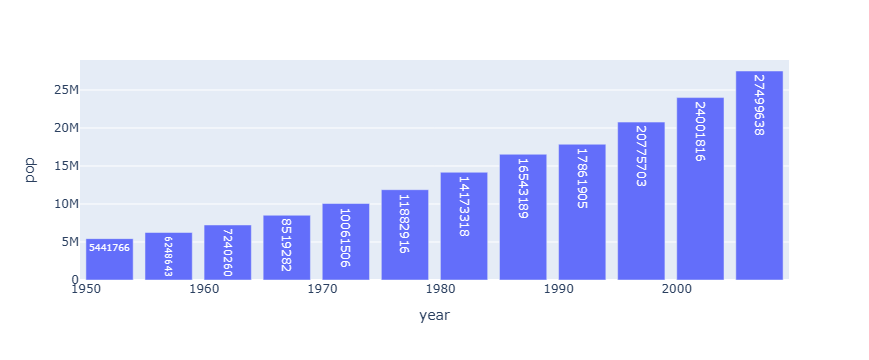

In [56]:
df_us = px.data.gapminder().query("country == 'Iraq'")
px.bar(df_us, x='year', y='pop', text='pop')

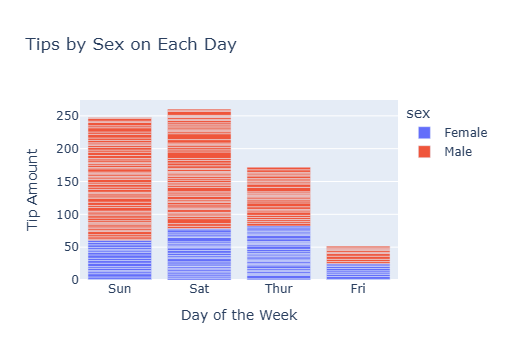

In [53]:
df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex',
      title='Tips by Sex on Each Day',
      labels={'tip': "Tip Amount", 'day': "Day of the Week"})

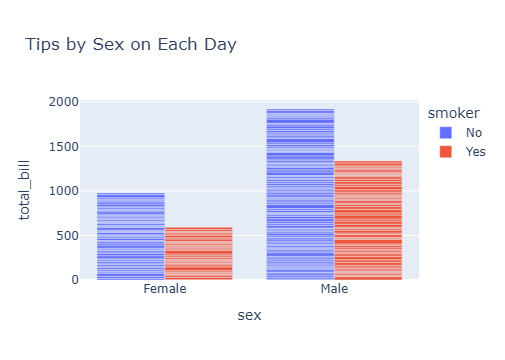

In [54]:
px.bar(df_tips, x='sex', y='total_bill', color='smoker',
       barmode='group',
      title='Tips by Sex on Each Day',
      labels={'tip': "Tip Amount", 'day': "Day of the Week"})

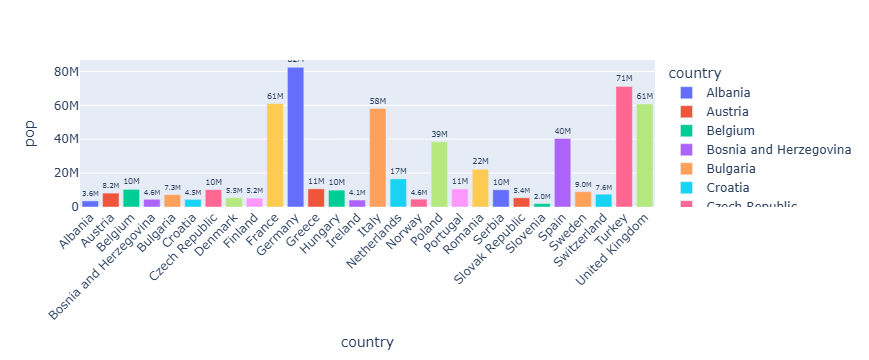

In [63]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate='%{text:.2s}', textposition="outside")
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)

fig

## Scatter Plots

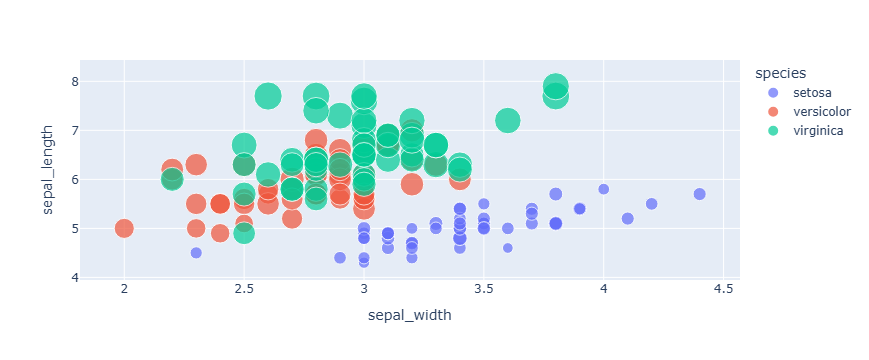

In [64]:
df_iris = px.data.iris()
px.scatter(df_iris, x='sepal_width', y='sepal_length',
          color='species', size='petal_length',
          hover_data=['petal_width'])

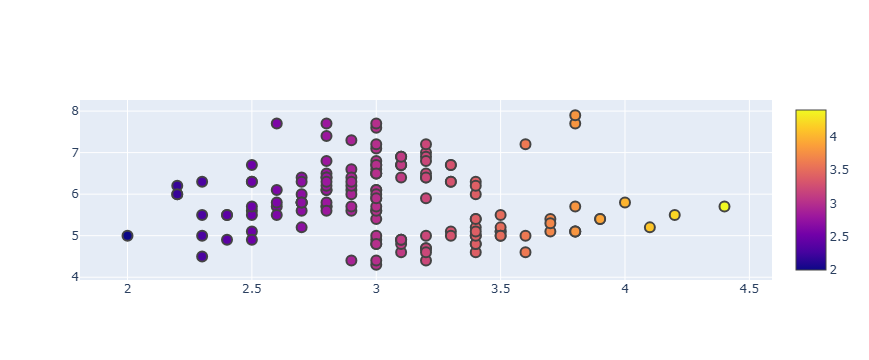

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_iris.sepal_width, y=df_iris.sepal_length,
    mode='markers',
    marker_color=df_iris.sepal_width,
    text=df_iris.species, marker=dict(showscale=True)))
fig.update_traces(marker_line_width=2, marker_size=10)

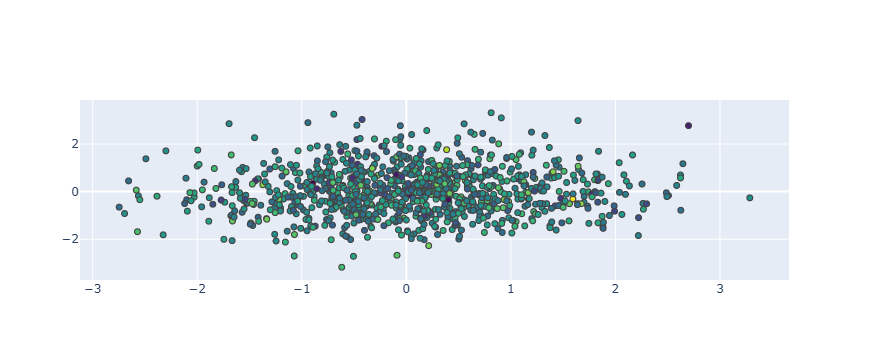

In [4]:
fig = go.Figure(data=go.Scattergl(
x = np.random.randn(1000),
y = np.random.randn(1000),
mode='markers',
marker=dict(
color = np.random.randn(1000),
colorscale='Viridis',
line_width=1)))
fig

## Pie Charts

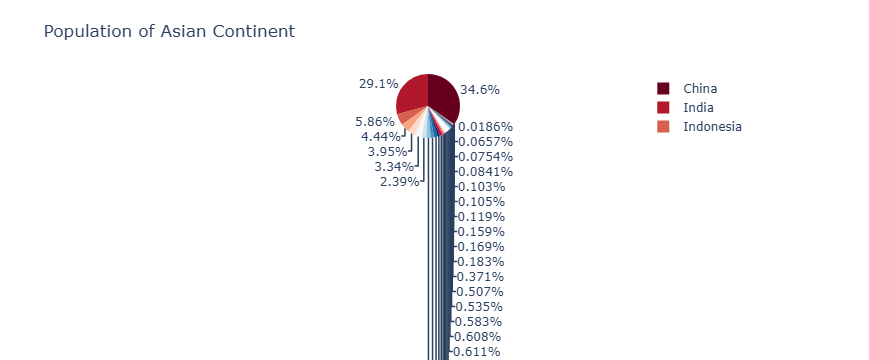

In [69]:
df_asia = px.data.gapminder().query("year == 2007").query("continent == 'Asia'")
px.pie(df_asia, values='pop', names='country',
      title='Population of Asian Continent',
      color_discrete_sequence=px.colors.sequential.RdBu)

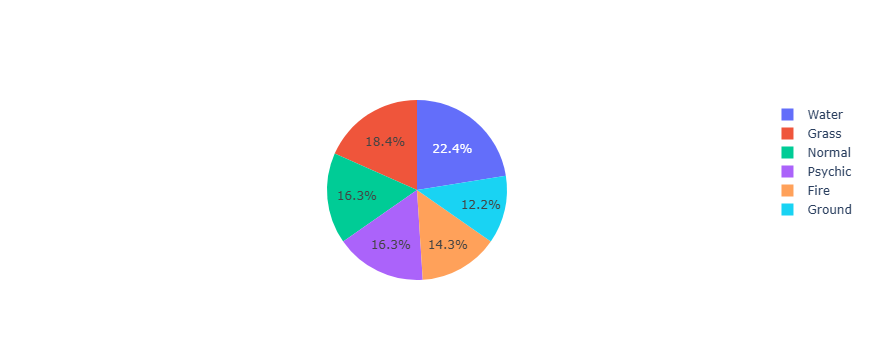

In [5]:
fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal',
                                     'Psychic', 'Fire', 'Ground'],
                            values=[110,90,80,80,70,60])])

fig

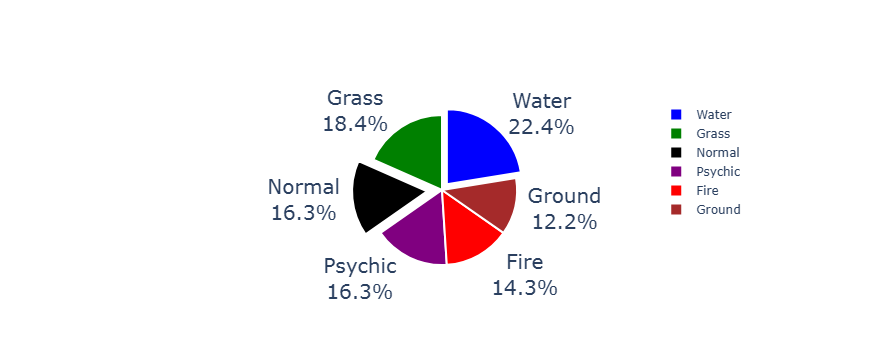

In [73]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal',
                                     'Psychic', 'Fire', 'Ground'],
                            values=[110,90,80,80,70,60])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                 textinfo='label+percent', 
                  pull=[0.1, 0, 0.2, 0, 0, 0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                     width=2)))

fig

## Histogram

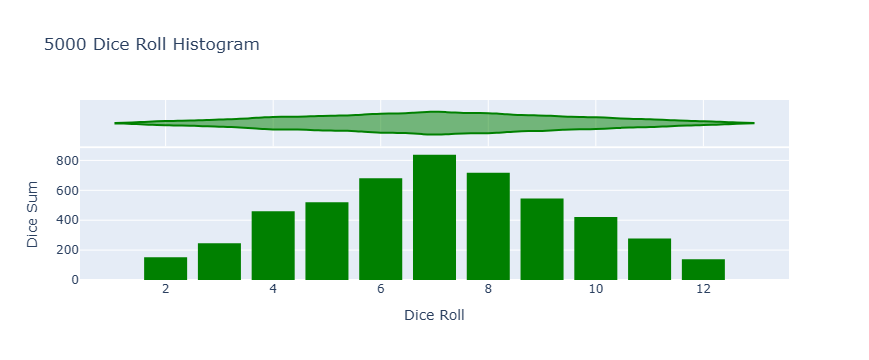

In [78]:
dice_1 = np.random.randint(1,7,5000)
dice_2 = np.random.randint(1,7,5000)
dice_sum = dice_1 + dice_2
fig = px.histogram(dice_sum, nbins=11, 
                   labels={'value': 'Dice Roll'},
                  title='5000 Dice Roll Histogram',
                  marginal='violin',
                  color_discrete_sequence=['green'])
fig.update_layout(
xaxis_title_text='Dice Roll',
yaxis_title_text='Dice Sum',
bargap = 0.2, showlegend = False)

fig

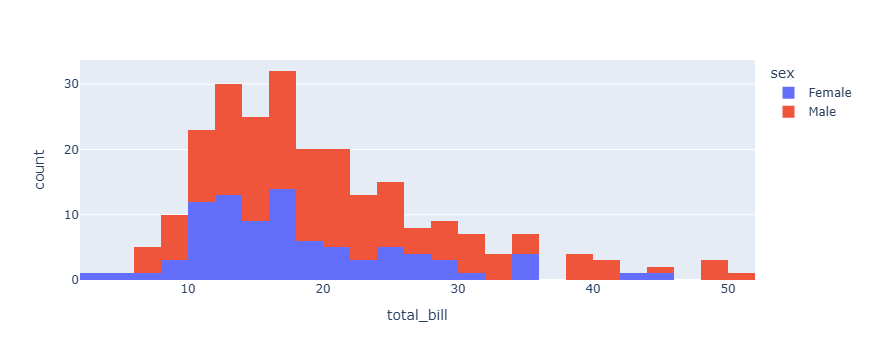

In [79]:
df_tips = px.data.tips()
px.histogram(df_tips, x='total_bill', color='sex')

## Box Plots

## Violin Plots

## Density Heatmaps

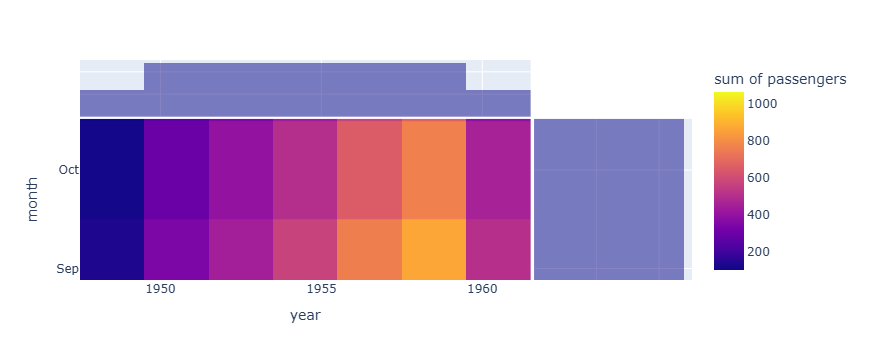

In [84]:
flights = sns.load_dataset("flights")

fig = px.density_heatmap(flights, x='year', y='month',
                        z='passengers',
                        marginal_x='histogram',
                        marginal_y='histogram')
fig

## 3D Scatter Plots

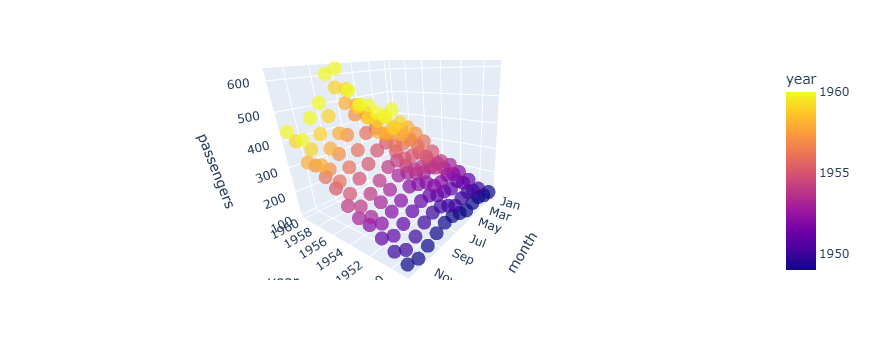

In [82]:
fig = px.scatter_3d(flights, x='year', y='month', z='passengers',
                   color='year', opacity=0.7)
fig

## 3D Line Plots

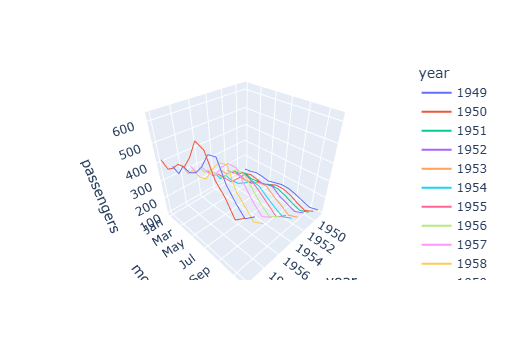

In [85]:
fig = px.line_3d(flights, x='year', y='month', z='passengers',
                color='year')
fig

## Scatter Matrix

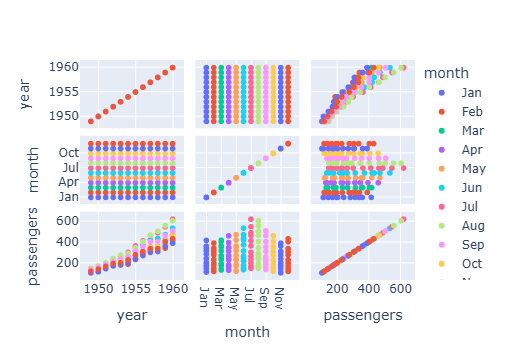

In [86]:
fig = px.scatter_matrix(flights, color='month')
fig

## Map Scatter Plots

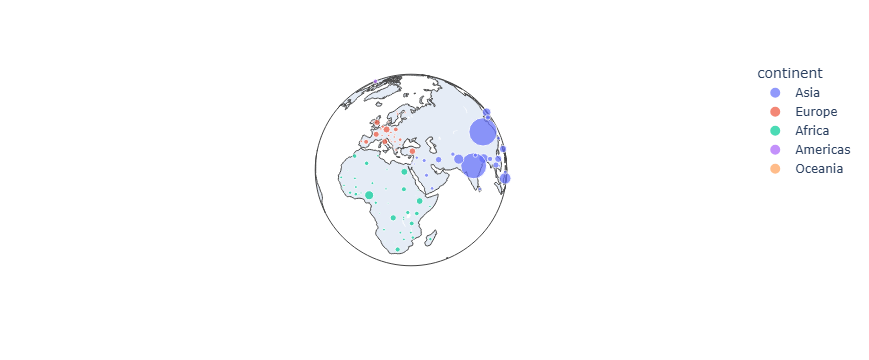

In [87]:
df = px.data.gapminder().query('year == 2007')
fig = px.scatter_geo(df, locations="iso_alpha",
                    color="continent",
                    hover_name="country",
                    size="pop",
                    projection="orthographic")
fig

## Choropleth Maps

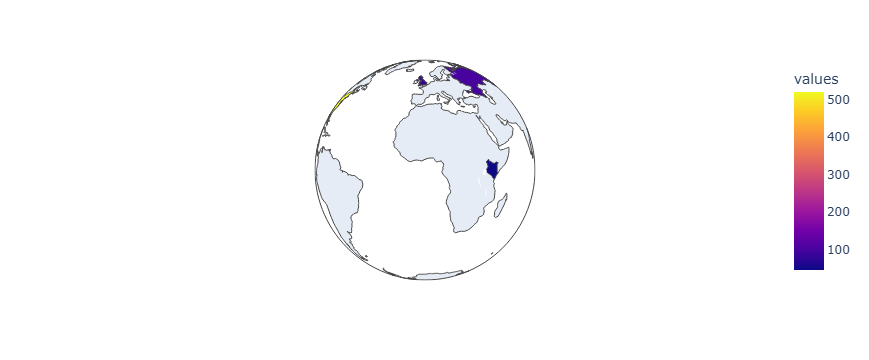

In [10]:
data = dict(
    country=['Kenya', 'USA', 'UK', 'Russia'],
    values=[45, 520, 80, 100]
)

df = pd.DataFrame(data)

fig = px.choropleth(df, locations='country', locationmode='country names', color='values',
                    hover_name='country', projection='orthographic')

fig

## Polar Charts

## Ternary Plot

## Facets

## Animated Plots

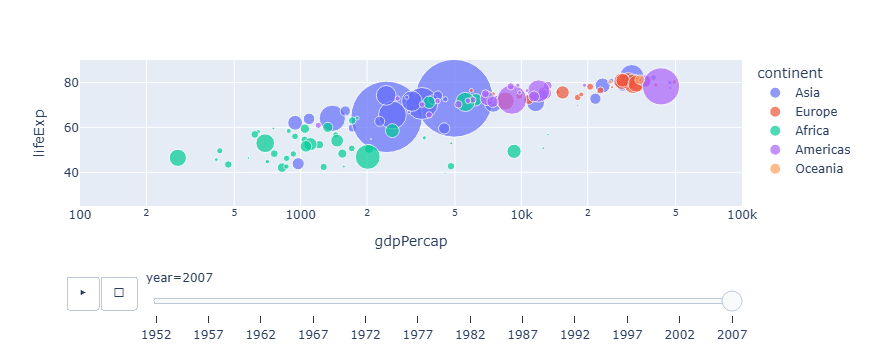

In [99]:
df_cnt = px.data.gapminder()
px.scatter(df_cnt, x='gdpPercap', y='lifeExp',
          animation_frame='year',
          animation_group='country',
          size='pop', color='continent', hover_name='country',
          log_x=True, size_max=55, range_x=[100,100000],
          range_y=[25,90])

In [11]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


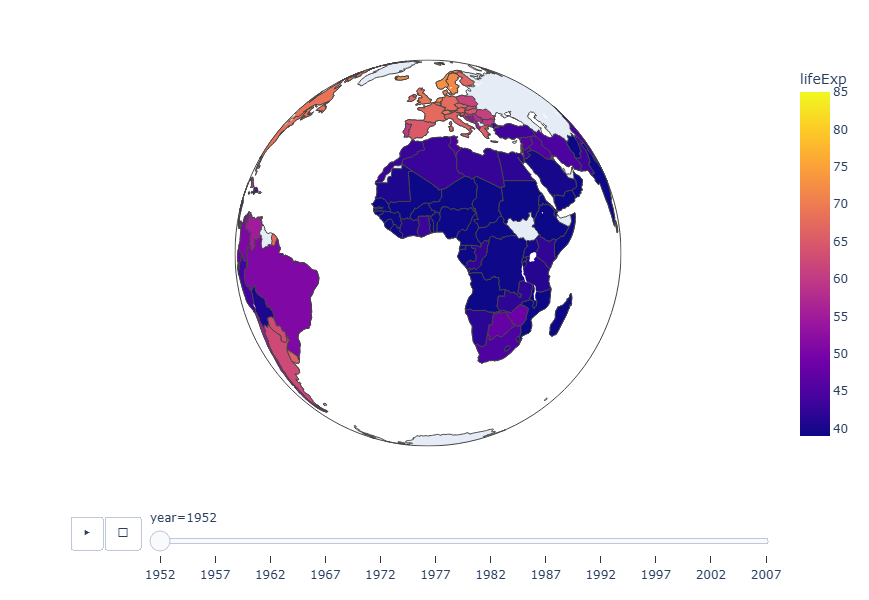

In [25]:
fig = px.choropleth(df, locations = 'country', locationmode = 'country names',
                   color = 'lifeExp', hover_name = 'country', projection = 'orthographic',
                   animation_frame = 'year', animation_group = 'country')

fig.update_coloraxes(cmin = 39, cmax = 85)
fig.update_layout(width=800, height=600)
fig